In [6]:
import pandas as pd #dataset
import numpy as np # matematis
import matplotlib.pyplot as plt #visual
from sklearn.model_selection import train_test_split #splitting dataset
import statsmodels.api as sm #model OLS
from sklearn.linear_model import BayesianRidge #model Bayes
from sklearn.svm import SVR #model SVM
from statsmodels.tools.eval_measures import rmse #evaluation model: RMSE

In [11]:
from google.colab import drive
drive.mount('/content/drive') #connect to gdrive

dt=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Salary_dataset.csv') #read csv
dt

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,No,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0
5,5,3.0,56643.0
6,6,3.1,60151.0
7,7,3.3,54446.0
8,8,3.3,64446.0
9,9,3.8,57190.0


In [12]:
dt.describe() #menjelaskan jenis-jenis statistika

,No,YearsExperience,Salary
count,30.000000,30.000000,30.000000
mean,14.500000,5.413333,76004.000000
std,8.803408,2.837888,27414.429785
min,0.000000,1.200000,37732.000000
25%,7.250000,3.300000,56721.750000
50%,14.500000,4.800000,65238.000000
75%,21.750000,7.800000,100545.750000
max,29.000000,10.600000,122392.000000


In [13]:
dt.corr() #korelasi antara lamanya berkerja vs salary


,No,YearsExperience,Salary
No,1.000000,0.986460,0.960826
YearsExperience,0.986460,1.000000,0.978242
Salary,0.960826,0.978242,1.000000


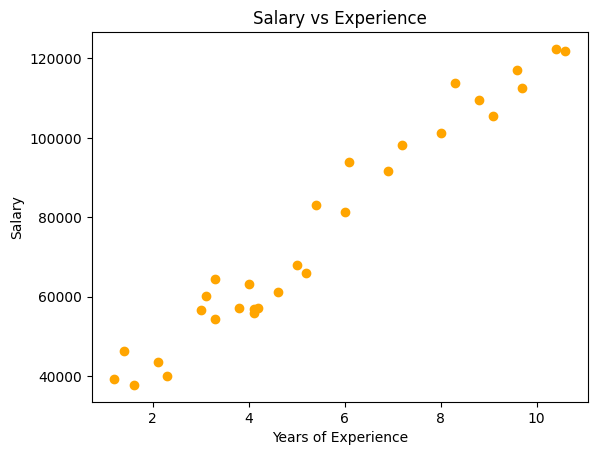

In [17]:
# Visualisasi data salary dibandingkan lamanya kerja
plt.scatter(dt['YearsExperience'], dt['Salary'], color = 'orange')
plt.title('Salary vs Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

In [26]:
#definisikan x sebagai shape 2 dimensi dan tidak skalar

YearsExperiencefix = dt[['YearsExperience']]
Salaryfix = dt['Salary']

In [73]:
YearsExperiencefix, Experience_coba, Salaryfix, salary_coba = train_test_split(YearsExperiencefix, Salaryfix, test_size=0.33, random_state=42)

In [33]:
model_OLS = sm.OLS(Salaryfix, YearsExperiencefix)
models = model_OLS.fit()
print(models.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Salary   R-squared (uncentered):                   0.974
Model:                            OLS   Adj. R-squared (uncentered):              0.972
Method:                 Least Squares   F-statistic:                              701.7
Date:                Mon, 03 Apr 2023   Prob (F-statistic):                    1.83e-16
Time:                        08:28:33   Log-Likelihood:                         -217.07
No. Observations:                  20   AIC:                                      436.1
Df Residuals:                      19   BIC:                                      437.1
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------

In [38]:
Predict_Salary_OLS = models.predict(YearsExperiencefix)
Predict_Salary_OLS

4      30297.784786
16     68499.339516
5      39518.849721
13     55326.389609
11     54009.094619
22    105383.599256
1      18442.129870
2      21076.719851
25    119873.844153
3      27663.194805
21     94845.239330
26    126460.319107
18     79037.699442
29    139633.269014
20     90893.354358
7      43470.734693
10     52691.799628
14     60595.569572
19     80354.994432
6      40836.144712
dtype: float64

In [39]:
Salaryfix

4      39892.0
16     66030.0
5      56643.0
13     57082.0
11     55795.0
22    101303.0
1      46206.0
2      37732.0
25    105583.0
3      43526.0
21     98274.0
26    116970.0
18     81364.0
29    121873.0
20     91739.0
7      54446.0
10     63219.0
14     61112.0
19     93941.0
6      60151.0
Name: Salary, dtype: float64

In [40]:
#RMSE
RMSE_OLS = rmse(Salaryfix, Predict_Salary_OLS)
RMSE_OLS

12511.911285586813

Bayessian Regression

In [65]:
model_BR = BayesianRidge()

In [66]:
model_BR = model_BR.fit(YearsExperiencefix, Salaryfix)

In [67]:
BayesianRidge()

BayesianRidge()

In [68]:
Predict_Salary_BR = model_BR.predict(YearsExperiencefix)

In [69]:
Predict_Salary_BR

array([ 46128.66038722,  73396.25963441,  52710.49468827,  63993.63920434,
        63053.37716134,  99723.59683858,  37666.30200016,  39546.82608618,
       110066.47931165,  44248.13630121,  92201.50049453, 114767.78952668,
        80918.35597846, 124170.40995675,  89380.71436551,  55531.28081728,
        62113.11511833,  67754.68737637,  81858.61802146,  53650.75673127])

In [71]:
#RMSE
RMSE_BR = rmse(Salaryfix, Predict_Salary_BR)
RMSE_BR

5458.668045302312

Support Vector Machine Regression

In [51]:
model_SVMR = SVR(kernel='rbf')

In [53]:
model_SVMR.fit(YearsExperiencefix, Salaryfix)
     

SVR()

In [54]:
Predict_Salary_SVMR = model_SVMR.predict(YearsExperiencefix)

In [62]:
Predict_Salary_SVMR


array([62161.67470754, 62168.79949305, 62162.10309256, 62165.11284591,
       62164.77580528, 62174.29073556, 62162.50175399, 62162.21013573,
       62173.75835301, 62161.73901828, 62173.88301032, 62173.25671027,
       62171.48603901, 62172.01434858, 62173.49573109, 62162.60783634,
       62164.45054115, 62166.54945882, 62171.77003723, 62162.25031861])

In [63]:
#RMSE
RMSE_SVMR = rmse(Salaryfix, Predict_Salary_SVMR)
RMSE_SVMR

27757.48009412226

Best Model

In [72]:

print('RMSE of Ordinary Least Square Model:', RMSE_OLS)
print('RMSE of Bayesian Regression Model:', RMSE_BR)
print('RMSE of Support Vector Machine Regression Model:', RMSE_SVMR)


RMSE of Ordinary Least Square Model: 12511.911285586813
RMSE of Bayesian Regression Model: 5458.668045302312
RMSE of Support Vector Machine Regression Model: 27757.48009412226
